# Amazon Bestsellers Dataset

### Section 1: Cleaning 

### Section 2: Exploring Trends

### Section 3: Visualization

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_64530/1211950534.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
books = pd.read_csv('/Users/tonymoceri/MSBDSA/personal_projects-1/datasets/amazon_bestsellers.csv')

In [3]:
books.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
books.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [6]:
books['Genre'].value_counts()

Genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64

In [12]:
# What percentage of the books are fiction?
fiction_books = books[books['Genre'] == 'Fiction']
non_fiction_books = books[books['Genre'] == 'Non Fiction']


In [16]:
print(round((fiction_books.shape[0] / books.shape[0])*100,2), '% of the books are fiction, whereas', round((non_fiction_books.shape[0] / books.shape[0])*100,2), '% of the books are non-fiction.')


43.64 % of the books are fiction, whereas 56.36 % of the books are non-fiction.


In [10]:
books['Year'].value_counts()

Year
2016    50
2011    50
2018    50
2017    50
2019    50
2014    50
2010    50
2009    50
2015    50
2013    50
2012    50
Name: count, dtype: int64

Because the dataset sampled to top 50 books from each year, the number of books in each year is exactly the same. How nice! 

In [11]:
books['Author'].value_counts().sort_values(ascending=False).head(20)

Author
Jeff Kinney                           12
Rick Riordan                          11
Suzanne Collins                       11
Gary Chapman                          11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
Dav Pilkey                             7
Eric Carle                             7
Bill O'Reilly                          7
Stephenie Meyer                        7
Stephen R. Covey                       7
The College Board                      6
E L James                              6
Don Miguel Ruiz                        6
J.K. Rowling                           6
Stieg Larsson                          6
Sarah Young                            6
Harper Lee                             6
Name: count, dtype: int64

From these initial lines of code, we can see that the author with the most listings is Jeff Kinney, author of the Diary of a Wimpy Kid series, following by Rick Riordan of Percy Jackson, Suzanne Collins of The Hunger Games, and Gary Chapman, author of several pop psychology books

In [18]:
fiction_books['Author'].value_counts().sort_values(ascending=False).head(20)

Author
Jeff Kinney              12
Rick Riordan             11
Suzanne Collins          11
Dr. Seuss                 9
Stephenie Meyer           7
Eric Carle                7
Dav Pilkey                7
J.K. Rowling              6
Stieg Larsson             6
Harper Lee                6
E L James                 6
John Green                5
John Grisham              5
Giles Andreae             5
R. J. Palacio             5
Charlaine Harris          4
Veronica Roth             4
Rod Campbell              4
Stephen King              4
Emily Winfield Martin     4
Name: count, dtype: int64

Looking at just fiction authors, we see that the top 3 are unchanged. 

On average, are fiction, or non-fiction, books rated higher? 

In [23]:
print('Fiction books have a mean user rating of', round(np.mean(fiction_books['User Rating']),2), 'while non-fiction books have a mean user rating of', round(np.mean(non_fiction_books['User Rating']),2))

Fiction books have a mean user rating of 4.65 while non-fiction books have a mean user rating of 4.6


Obviously, these are the top 50 books so there are not going to be many books with user ratings below a certain threshold. In fact, let's look at the distribution of ratings

<Axes: >

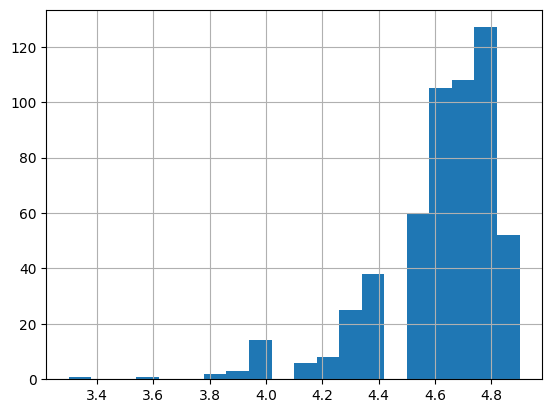

In [30]:
books['User Rating'].hist(bins=20)

They are heavily left-skewed, which is not surprising. We are not going to get super meaningful descriptive statistics since that dataset is inharently biased toward high-rated books. We could, however, see if there are any small trends in the data. For example, 